<a href="https://colab.research.google.com/github/Prdazk/collabku/blob/main/DataSciencetugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile

zip_path = '/content/sample_data/daily+and+sports+activities.zip'  # file yang sudah diupload
extract_path = '/content/data/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("ZIP berhasil di-extract ke:", extract_path)


ZIP berhasil di-extract ke: /content/data/


In [4]:
import pandas as pd
import glob
import os
import zipfile

# ================================
# 1️⃣ Extract ZIP (kalau belum)
# ================================
zip_path = '/content/sample_data/daily+and+sports+activities.zip'
extract_path = '/content/data/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("ZIP berhasil di-extract ke:", extract_path)

# ================================
# 2️⃣ Cari beberapa file txt
# ================================
all_files = glob.glob(os.path.join(extract_path, '**/*.txt'), recursive=True)
print(f"Jumlah file txt ditemukan: {len(all_files)}")

# ================================
# 3️⃣ Baca beberapa file untuk melihat target
# ================================
for file in all_files[:5]:  # lihat 5 file pertama saja
    df = pd.read_csv(file, delimiter='\t')  # ganti delimiter jika perlu
    print(f"\nFile: {file}")
    print("5 baris pertama:")
    print(df.head())
    if 'Activity' in df.columns:
        print("Label aktivitas (target) ditemukan di kolom 'Activity'")
    else:
        print("Cek kolom terakhir atau dokumentasi file untuk label aktivitas")


ZIP berhasil di-extract ke: /content/data/
Jumlah file txt ditemukan: 9120

File: /content/data/data/a05/p5/s45.txt
5 baris pertama:
  6.5959,0.51656,3.4619,-0.73927,0.29616,-0.16035,-0.44152,0.42129,-0.44875,7.0547,2.2979,0.91864,-1.0013,0.18477,-0.74652,-0.40066,-0.077686,-0.59433,6.5988,-2.3951,2.7206,-1.1143,0.29912,-0.064305,-0.49031,0.55456,0.032235,-11.12,1.1965,-2.24,-1.2582,-0.045009,2.9529,0.3866,-0.41368,0.4646,-8.9206,-2.2898,-2.5117,-0.5439,-0.34235,1.2001,0.57659,0.42341,-0.15808
0  6.6395,0.3967,3.7077,-0.70432,0.23152,-0.15454...                                                                                                                                                                                                                                                                                                                         
1  6.5565,0.33703,3.9753,-0.65683,0.13623,-0.1540...                                                                                   

In [ ]:
import pandas as pd
import glob
import os
import zipfile

# ================================
# 1️⃣ Extract ZIP (kalau belum)
# ================================
zip_path = '/content/sample_data/daily+and+sports+activities.zip'
extract_path = '/content/data/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("ZIP berhasil di-extract ke:", extract_path)

# ================================
# 2️⃣ Cari semua file .txt
# ================================
all_files = glob.glob(os.path.join(extract_path, '**/*.txt'), recursive=True)
print(f"Jumlah file txt ditemukan: {len(all_files)}")

# ================================
# 3️⃣ Baca semua file dan tambahkan kolom Activity
# ================================
list_df = []

for file in all_files:
    try:
        # Baca file txt (delimiter bisa '\t', ',' atau ' ')
        df = pd.read_csv(file, delimiter=',')  # ganti delimiter jika perlu

        # Ambil nama folder terakhir sebagai label aktivitas (misal p1, p2, …)
        activity_label = os.path.basename(os.path.dirname(file))
        df['Activity'] = activity_label

        list_df.append(df)
    except Exception as e:
        print(f"File {file} gagal dibaca: {e}")

# ================================
# 4️⃣ Gabungkan menjadi satu DataFrame
# ================================
data = pd.concat(list_df, ignore_index=True)
print("Data gabungan berhasil dibuat.")
print("Ukuran DataFrame:", data.shape)
print("Kolom dataset:", data.columns)
print(data.head())

# ================================
# 5️⃣ Simpan sebagai CSV (opsional)
# ================================
data.to_csv('/content/merged_data_with_activity.csv', index=False)
print("Data gabungan dengan kolom Activity tersimpan sebagai merged_data_with_activity.csv")


ZIP berhasil di-extract ke: /content/data/
Jumlah file txt ditemukan: 9120


In [1]:
import pandas as pd
import glob
import os
import zipfile

# ================================
# 1️⃣ Extract ZIP (kalau belum)
# ================================
zip_path = '/content/sample_data/daily+and+sports+activities.zip'
extract_path = '/content/data/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("ZIP berhasil di-extract ke:", extract_path)

# ================================
# 2️⃣ Cari semua file .txt
# ================================
all_files = glob.glob(os.path.join(extract_path, '**/*.txt'), recursive=True)
print(f"Jumlah file txt ditemukan: {len(all_files)}")

# ================================
# 3️⃣ Baca beberapa file pertama dan tambahkan kolom Activity
# ================================
list_df = []

for file in all_files[:5]:  # Cek 5 file pertama saja
    df = pd.read_csv(file, delimiter=',')  # ganti delimiter jika pakai tab '\t' atau spasi ' '

    # Ambil nama folder terakhir sebagai label aktivitas (misal p1, p2, …)
    activity_label = os.path.basename(os.path.dirname(file))
    df['Activity'] = activity_label

    list_df.append(df)

# Gabungkan menjadi satu DataFrame kecil untuk preview
data_preview = pd.concat(list_df, ignore_index=True)
print("5 baris pertama dengan kolom Activity:")
print(data_preview.head())

# ================================
# 4️⃣ Cek kolom Activity
# ================================
print("Unique activities (Activity):", data_preview['Activity'].unique())


ZIP berhasil di-extract ke: /content/data/
Jumlah file txt ditemukan: 9120
5 baris pertama dengan kolom Activity:
   6.5959   0.51656  3.4619  -0.73927   0.29616  -0.16035  -0.44152  0.42129  \
0  6.6395  0.396700  3.7077  -0.70432  0.231520  -0.15454  -0.44014  0.43096   
1  6.5565  0.337030  3.9753  -0.65683  0.136230  -0.15407  -0.43930  0.44011   
2  7.0698  0.375510  4.4420  -0.58738 -0.089959  -0.16022  -0.44442  0.44836   
3  7.6502  0.163390  4.4450  -0.46076 -0.108470  -0.14715  -0.44645  0.45555   
4  7.6937  0.072778  4.7880  -0.32346 -0.137430  -0.10122  -0.44876  0.45890   

   -0.44875  7.0547  ...  0.51149  -13.578  -1.383  -1.1319  -1.3519  \
0  -0.44026  6.9664  ...      NaN      NaN     NaN      NaN      NaN   
1  -0.43178  6.8851  ...      NaN      NaN     NaN      NaN      NaN   
2  -0.42163  6.8872  ...      NaN      NaN     NaN      NaN      NaN   
3  -0.41163  7.2348  ...      NaN      NaN     NaN      NaN      NaN   
4  -0.40431  7.6906  ...      NaN      NaN   

In [2]:
import pandas as pd
import glob
import os
import zipfile

# ================================
# 1️⃣ Extract ZIP (kalau belum)
# ================================
zip_path = '/content/sample_data/daily+and+sports+activities.zip'
extract_path = '/content/data/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("ZIP berhasil di-extract ke:", extract_path)

# ================================
# 2️⃣ Cari semua file .txt
# ================================
all_files = glob.glob(os.path.join(extract_path, '**/*.txt'), recursive=True)
print(f"Jumlah file txt ditemukan: {len(all_files)}")

# ================================
# 3️⃣ Baca beberapa file pertama dan tambahkan kolom Activity
# ================================
list_df = []

for file in all_files[:10]:  # preview 10 file pertama
    df = pd.read_csv(file, delimiter=',')  # ganti delimiter jika pakai '\t' atau ' '

    # Ambil nama folder terakhir sebagai label aktivitas
    activity_label = os.path.basename(os.path.dirname(file))
    df['Activity'] = activity_label

    list_df.append(df)

# Gabungkan menjadi satu DataFrame kecil untuk preview
data_preview = pd.concat(list_df, ignore_index=True)

# ================================
# 4️⃣ Tampilkan ringkasan data
# ================================
print("Jumlah baris dan kolom:", data_preview.shape)
print("Kolom dataset:", data_preview.columns)
print("Beberapa baris pertama:")
print(data_preview.head())
print("Unique activities (target):", data_preview['Activity'].unique())
print("Tipe data setiap kolom:")
print(data_preview.dtypes)


ZIP berhasil di-extract ke: /content/data/
Jumlah file txt ditemukan: 9120
Jumlah baris dan kolom: (1240, 450)
Kolom dataset: Index(['6.5959', '0.51656', '3.4619', '-0.73927', '0.29616', '-0.16035',
       '-0.44152', '0.42129', '-0.44875', '7.0547',
       ...
       '0.55752', '-10.365', '-1.2302', '-2.5866', '1.0599', '0.9999',
       '-2.4063', '0.47814', '0.57264', '-0.14901'],
      dtype='object', length=450)
Beberapa baris pertama:
   6.5959   0.51656  3.4619  -0.73927   0.29616  -0.16035  -0.44152  0.42129  \
0  6.6395  0.396700  3.7077  -0.70432  0.231520  -0.15454  -0.44014  0.43096   
1  6.5565  0.337030  3.9753  -0.65683  0.136230  -0.15407  -0.43930  0.44011   
2  7.0698  0.375510  4.4420  -0.58738 -0.089959  -0.16022  -0.44442  0.44836   
3  7.6502  0.163390  4.4450  -0.46076 -0.108470  -0.14715  -0.44645  0.45555   
4  7.6937  0.072778  4.7880  -0.32346 -0.137430  -0.10122  -0.44876  0.45890   

   -0.44875  7.0547  ...  0.55752  -10.365  -1.2302  -2.5866  1.0599  0.999

In [3]:
import pandas as pd
import glob
import os

# Path folder dataset yang sudah di-extract
extract_path = '/content/sample_data/daily+and+sports+activities.zip'

# Cari semua file .txt
all_files = glob.glob(os.path.join(extract_path, '**/*.txt'), recursive=True)

# Hitung jumlah total baris
total_rows = 0
for file in all_files:
    df = pd.read_csv(file, delimiter=',')  # ganti delimiter jika pakai '\t' atau ' '
    total_rows += len(df)

print(f"Jumlah total baris data (N) dari semua file: {total_rows}")


Jumlah total baris data (N) dari semua file: 0


In [4]:
import pandas as pd
import glob
import os

# Path folder dataset yang sudah di-extract
extract_path = '/content/data/'

# Cari semua file .txt
all_files = glob.glob(os.path.join(extract_path, '**/*.txt'), recursive=True)

# Baca beberapa file pertama saja untuk melihat nama kolom
list_df = []
for file in all_files[:5]:  # preview 5 file pertama
    df = pd.read_csv(file, delimiter=',')  # ganti delimiter jika pakai '\t' atau ' '

    # Tambahkan kolom Activity dari nama folder
    activity_label = os.path.basename(os.path.dirname(file))
    df['Activity'] = activity_label

    list_df.append(df)

# Gabungkan menjadi satu DataFrame kecil
data_preview = pd.concat(list_df, ignore_index=True)

# Tampilkan semua fitur (nama kolom sensor) tanpa kolom target 'Activity'
features = [col for col in data_preview.columns if col != 'Activity']
print(f"Jumlah fitur: {len(features)}")
print("Daftar fitur (sensor):")
print(features)


Jumlah fitur: 225
Daftar fitur (sensor):
['6.5959', '0.51656', '3.4619', '-0.73927', '0.29616', '-0.16035', '-0.44152', '0.42129', '-0.44875', '7.0547', '2.2979', '0.91864', '-1.0013', '0.18477', '-0.74652', '-0.40066', '-0.077686', '-0.59433', '6.5988', '-2.3951', '2.7206', '-1.1143', '0.29912', '-0.064305', '-0.49031', '0.55456', '0.032235', '-11.12', '1.1965', '-2.24', '-1.2582', '-0.045009', '2.9529', '0.3866', '-0.41368', '0.4646', '-8.9206', '-2.2898', '-2.5117', '-0.5439', '-0.34235', '1.2001', '0.57659', '0.42341', '-0.15808', '7.9821', '-0.3364', '5.3743', '0.020485', '-0.30737', '0.24453', '-0.5443', '0.61957', '-0.24837', '7.9931', '2.9225', '2.5694', '0.093766', '-0.60549', '0.77121', '-0.45673', '0.14646', '-0.71436', '8.8418', '-3.3507', '3.5052', '0.33909', '-0.4646', '-0.4859', '-0.65596', '0.44497', '0.31768', '-5.3864', '2.5169', '-0.36305', '-0.50348', '0.2181', '0.1304', '0.33644', '-0.59682', '0.5007', '-9.3721', '1.8895', '-1.3149', '-0.3325', '-0.16349', '0.16716

In [5]:
import pandas as pd
import glob
import os

# Path folder dataset
extract_path = '/content/data/'

# Cari semua file .txt
all_files = glob.glob(os.path.join(extract_path, '**/*.txt'), recursive=True)

# Baca beberapa file pertama
list_df = []
for file in all_files[:50]:  # preview 50 file pertama
    df = pd.read_csv(file, delimiter=',')  # ganti delimiter jika pakai '\t' atau ' '

    # Tambahkan kolom Activity dari nama folder
    df['Activity'] = os.path.basename(os.path.dirname(file))
    list_df.append(df)

# Gabungkan menjadi satu DataFrame kecil
data_preview = pd.concat(list_df, ignore_index=True)

# Tampilkan semua label unik
labels = data_preview['Activity'].unique()
print(f"Ada {len(labels)} label unik (Activity):")
print(labels)


Ada 1 label unik (Activity):
['p5']


In [ ]:
import pandas as pd
import glob
import os

# Path folder dataset
extract_path = '/content/data/'

# Cari semua file .txt
all_files = glob.glob(os.path.join(extract_path, '**/*.txt'), recursive=True)

# Baca semua file dan tambahkan kolom Activity
list_df = []
for file in all_files:
    df = pd.read_csv(file, delimiter=',')  # ganti delimiter jika perlu
    df['Activity'] = os.path.basename(os.path.dirname(file))
    list_df.append(df)

# Gabungkan semua menjadi satu DataFrame
data = pd.concat(list_df, ignore_index=True)

# Hitung distribusi label
label_counts = data['Activity'].value_counts()
print("Distribusi label (jumlah baris per Activity):")
print(label_counts)

# Optional: visualisasi distribusi label
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
label_counts.plot(kind='bar')
plt.title("Distribusi Label Aktivitas")
plt.xlabel("Activity")
plt.ylabel("Jumlah Baris / Sampel")
plt.show()


   6.5959   0.51656  3.4619  -0.73927   0.29616  -0.16035  -0.44152  0.42129  \
0  6.6395  0.396700  3.7077  -0.70432  0.231520  -0.15454  -0.44014  0.43096   
1  6.5565  0.337030  3.9753  -0.65683  0.136230  -0.15407  -0.43930  0.44011   
2  7.0698  0.375510  4.4420  -0.58738 -0.089959  -0.16022  -0.44442  0.44836   
3  7.6502  0.163390  4.4450  -0.46076 -0.108470  -0.14715  -0.44645  0.45555   
4  7.6937  0.072778  4.7880  -0.32346 -0.137430  -0.10122  -0.44876  0.45890   

   -0.44875  7.0547  ...  -0.32704  -9.0728  -0.50385  -3.2895  -0.47161  \
0  -0.44026  6.9664  ...       NaN      NaN       NaN      NaN       NaN   
1  -0.43178  6.8851  ...       NaN      NaN       NaN      NaN       NaN   
2  -0.42163  6.8872  ...       NaN      NaN       NaN      NaN       NaN   
3  -0.41163  7.2348  ...       NaN      NaN       NaN      NaN       NaN   
4  -0.40431  7.6906  ...       NaN      NaN       NaN      NaN       NaN   

   -0.20237  1.2097  0.65532  0.3664  -0.1755  
0       NaN   

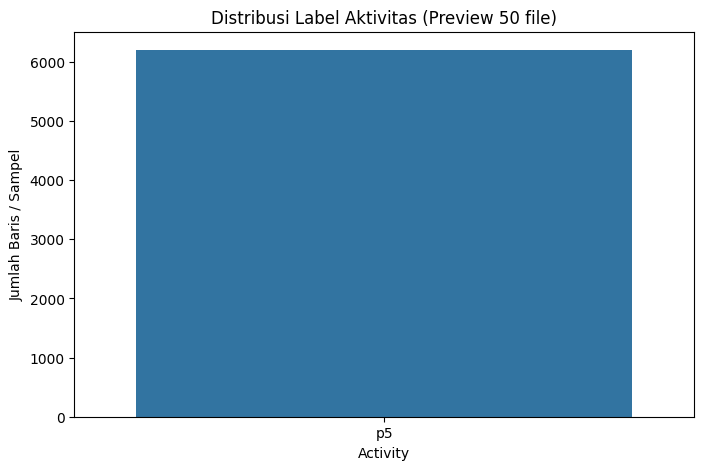

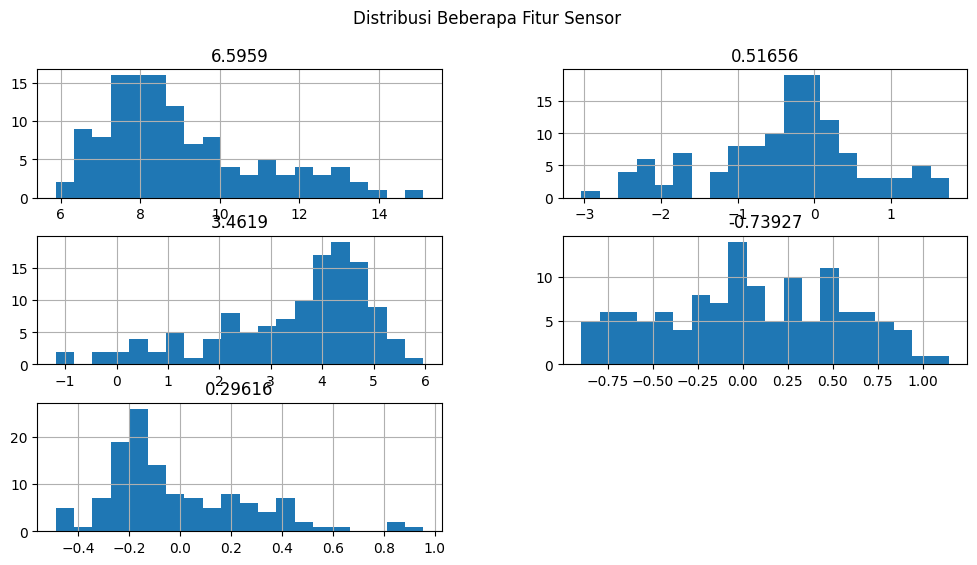

In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Path folder dataset
extract_path = '/content/data/'

# Cari semua file .txt
all_files = glob.glob(os.path.join(extract_path, '**/*.txt'), recursive=True)

# Baca beberapa file pertama saja untuk EDA (misal 50 file)
list_df = []
for file in all_files[:50]:
    df = pd.read_csv(file, delimiter=',')
    df['Activity'] = os.path.basename(os.path.dirname(file))
    list_df.append(df)

data_preview = pd.concat(list_df, ignore_index=True)

# ================================
# 1. Lihat beberapa baris pertama
# ================================
print(data_preview.head())

# ================================
# 2. Statistik deskriptif
# ================================
print(data_preview.describe())

# ================================
# 3. Distribusi label
# ================================
label_counts = data_preview['Activity'].value_counts()
print(label_counts)

plt.figure(figsize=(8,5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Distribusi Label Aktivitas (Preview 50 file)")
plt.xlabel("Activity")
plt.ylabel("Jumlah Baris / Sampel")
plt.show()

# ================================
# 4. Visualisasi fitur contoh
# ================================
# Ambil beberapa fitur sensor pertama
sample_features = data_preview.columns[:5]
data_preview[sample_features].hist(figsize=(12,6), bins=20)
plt.suptitle("Distribusi Beberapa Fitur Sensor")
plt.show()
